In [1]:
import pandas as pd 

In [2]:
df1 = pd.DataFrame(pd.read_csv(r"data/Car_data.csv"))

df1.head()

In [4]:
X = df1.drop(columns=['Present_Price'], axis = 1)
Y = df1["Present_Price"]

In [5]:
numerical_columns = X.select_dtypes(exclude= 'object').columns
categorical_columns = X.select_dtypes(include= 'object').columns

In [29]:
numerical_columns

Index(['Year', 'Selling_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [6]:
categorical_columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

# Create categories

In [7]:
df1["Car_Name"].value_counts().sort_values()

Car_Name
vitara brezza      1
alto 800           1
baleno             1
Hyosung GT250R     1
etios gd           1
                  ..
brio              10
fortuner          11
verna             14
corolla altis     16
city              26
Name: count, Length: 98, dtype: int64

In [18]:
car_categories = ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
       'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ',
       'Honda Dream Yuga ', 'Bajaj Avenger Street 220',
       'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
       'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS',
       'Activa 4g', 'Honda CB Unicorn', 'Hero Honda CBZ extreme',
       'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
       'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
       'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego',
       'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor', 'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc',
       'Hero  CBZ Xtreme', 'Bajaj  ct 100', 'i20', 'grand i10', 'i10',
       'eon', 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio',
       'amaze', 'jazz']

In [10]:
df1["Fuel_Type"].value_counts().sort_values()

Fuel_Type
CNG         2
Diesel     60
Petrol    239
Name: count, dtype: int64

In [13]:
Fuel_categories =['CNG','Diesel','Petrol']

In [11]:
df1["Seller_Type"].value_counts().sort_values()

Seller_Type
Individual    106
Dealer        195
Name: count, dtype: int64

In [14]:
Seller_categories =['Individual','Dealer']

In [12]:
df1["Transmission"].value_counts().sort_values()

Transmission
Automatic     40
Manual       261
Name: count, dtype: int64

In [15]:
Trans_categories =['Automatic','Manual']

# Create Pipeline

In [16]:
from sklearn.impute import SimpleImputer # Missing values
from sklearn.preprocessing import StandardScaler # Feature scaling (Numerical datatypes)
from sklearn.preprocessing import OrdinalEncoder # To rank the categorical variables
#Pipeline 
from sklearn.pipeline import Pipeline # To club everything together 
from sklearn.compose import ColumnTransformer # Begin the work 
from sklearn.model_selection import train_test_split

In [19]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy= "median")), 
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy= "most_frequent")), 
        ("OrdinalEncoder", OrdinalEncoder(categories= [car_categories, Fuel_categories, Seller_categories, Trans_categories])), 
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    [
        ('num_pipeline', num_pipeline, numerical_columns), 
        ('cat_pipeline', cat_pipeline, categorical_columns)
    ]
)

Train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state= 45)

In [21]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out()) 
X_test = pd.DataFrame(preprocessor.transform(X_test), columns = preprocessor.get_feature_names_out())

In [22]:
X_train.head()

,num_pipeline__Year,num_pipeline__Selling_Price,num_pipeline__Kms_Driven,num_pipeline__Owner,cat_pipeline__Car_Name,cat_pipeline__Fuel_Type,cat_pipeline__Seller_Type,cat_pipeline__Transmission
0,1.176784,-0.363197,-0.898206,-0.169031,-1.283085,0.495188,0.728431,0.392232
1,-0.482216,-0.826886,-0.599833,-0.169031,0.068910,0.495188,-1.372813,0.392232
2,0.181384,1.259714,0.455680,-0.169031,-1.024192,-1.826004,0.728431,0.392232
3,-1.145816,-0.813362,0.136145,-0.169031,-0.017387,0.495188,-1.372813,0.392232
4,-1.145816,0.873306,0.473971,-0.169031,-1.052958,-1.826004,0.728431,0.392232


Apply the Models

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
pred = regression.predict(X_test)

In [36]:
pred

array([ 2.49108103e+01, -1.57806720e+00, -2.29828260e+00,  9.22558732e+00,
        7.71755902e+00,  9.94442311e+00,  2.26728656e+01,  1.12799162e-01,
        1.43224526e+00,  7.63948011e+00, -1.56492734e+00,  1.15336094e+01,
        8.77529399e+00,  8.02726572e+00,  6.79912545e+00,  4.23631957e+00,
        4.81154002e+00,  6.71521440e+00,  1.25348771e+01,  5.36394213e+00,
       -2.98265849e-01,  9.09968784e-01,  1.04208463e+01,  7.79156990e+00,
       -3.11282983e+00,  1.98752669e+01,  1.89851880e+01,  1.48442697e+01,
        4.33529856e-01,  1.23002120e+01,  2.94810459e+00,  6.69470962e+00,
       -3.99575057e-01, -3.66340680e+00,  1.52688943e+01,  7.84957078e+00,
       -1.11593134e+00,  5.90303638e+00, -1.13753859e+00,  6.27427429e+00,
        7.62572888e+00,  3.72775835e+01,  2.70501762e-01, -3.64295395e-01,
       -8.82782688e-02,  8.70227168e+00,  1.30273667e+01,  7.17235757e+00,
        1.12901382e+01, -4.28472197e-01, -2.02590026e-02,  3.85075357e+00,
        7.31499704e+00,  

In [25]:
regression.coef_

array([-2.24903849,  8.69279091,  0.50306744,  0.61206259, -0.6716558 ,
        0.55374635,  0.33682205,  0.40810141])

In [26]:
regression.intercept_

np.float64(8.017417777777746)

In [30]:
regression.score(X_train,y_train)

np.float64(0.8446474828941208)

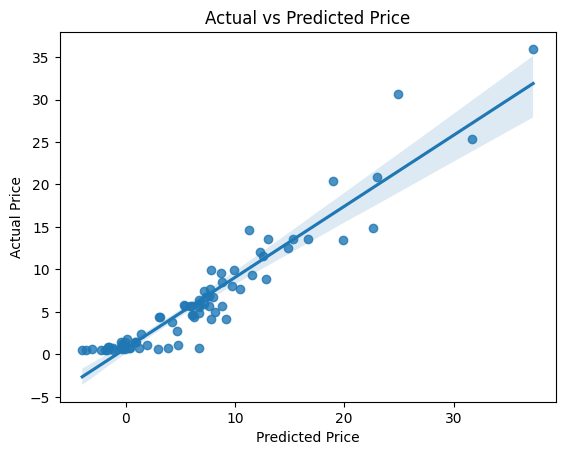

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()

In [27]:
import numpy as np 
def model_evaluation(true, predicted): 
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    return mae, mse, r2_square, rmse 

Training Multiple Models

In [40]:
models = {
    "LinearRegression": LinearRegression(), 
    "Lasso": Lasso(), 
    "Ridge": Ridge()
}

model_list = []
r2_list = []

for i in range(len(list(models))): 
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae, mse, r2_square, rmse = model_evaluation(y_test, y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model training performance")
    print(f"The MAE score is {mae}")
    print(f"The MSE score is {mse}")
    print(f"The R2 score is {r2_square}")
    print(f"The RMSE score is {rmse}")

    r2_list.append(r2_square)
    print("*"*35)
    print("\n")

LinearRegression
Model training performance
The MAE score is 1.9849902110088302
The MSE score is 6.673367369477993
The R2 score is 0.8603619654395428
The RMSE score is 2.5832861571026142
***********************************


Lasso
Model training performance
The MAE score is 1.5697419599046074
The MSE score is 4.697242081237898
The R2 score is 0.9017117422489451
The RMSE score is 2.1673121789991163
***********************************


Ridge
Model training performance
The MAE score is 1.9707229308345267
The MSE score is 6.557502194842805
The R2 score is 0.8627864064097882
The RMSE score is 2.56076203401308
***********************************


